In [1]:
from __future__ import absolute_import, division, print_function

In [1]:
%matplotlib inline 

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

In [2]:
#linear regression, with additive noise
f = lambda x, e: 2*x + 3 + e
f_vec =  np.vectorize(f)

In [3]:
samples = 200
e = np.random.normal(0.0, 0.2, samples)
x = np.random.rand(samples)
y = f_vec(x,e)

# transform into columns
x = x.reshape(-1,1)
y = y.reshape(-1,1)

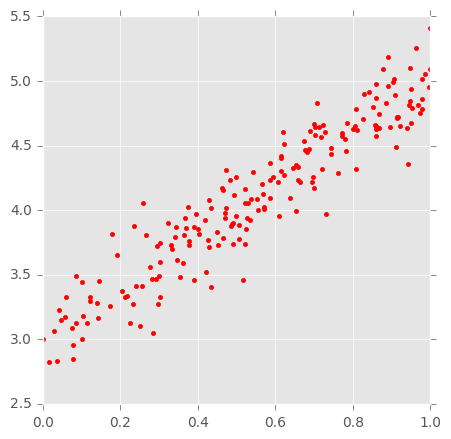

In [4]:
plt.figure(figsize=(5,5))
plt.plot(x, y, 'r.')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

Using TensorFlow backend.


In [7]:
model = Sequential()
model.add(Dense(1, input_dim=1))

In [8]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=["accuracy"])

In [9]:
model.fit(x_train, y_train,
          batch_size=5, nb_epoch=5, verbose=1,
          validation_data=(x_test, y_test))

Train on 160 samples, validate on 40 samples
Epoch 1/5
160/160 [==============================] - 0s - loss: 7.9464 - acc: 0.0000e+00 - val_loss: 3.0966 - val_acc: 0.0000e+00
Epoch 2/5
160/160 [==============================] - 0s - loss: 1.4888 - acc: 0.0000e+00 - val_loss: 0.5881 - val_acc: 0.0000e+00
Epoch 3/5
160/160 [==============================] - 0s - loss: 0.3082 - acc: 0.0000e+00 - val_loss: 0.1347 - val_acc: 0.0000e+00
Epoch 4/5
160/160 [==============================] - 0s - loss: 0.0916 - acc: 0.0000e+00 - val_loss: 0.0488 - val_acc: 0.0000e+00
Epoch 5/5
160/160 [==============================] - 0s - loss: 0.0513 - acc: 0.0000e+00 - val_loss: 0.0333 - val_acc: 0.0000e+00


In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy (MSE):', score[0])

Test accuracy (MSE): 0.0333287596703


In [11]:
y_test_predict = model.predict(x_test)
y_test_predict[:10]

array([[ 4.90717459],
       [ 3.65642238],
       [ 4.654006  ],
       [ 4.47007275],
       [ 4.52221918],
       [ 4.83669233],
       [ 3.64966345],
       [ 4.08108568],
       [ 3.08022928],
       [ 4.72578049]], dtype=float32)

In [12]:
w, b = model.layers[0].get_weights()
w_ = w[0][0]
b_ = b[0]
print("Regression a = {:.2}, b = {:.2}".format(w_, b_))

Regression a = 1.9, b = 3.0


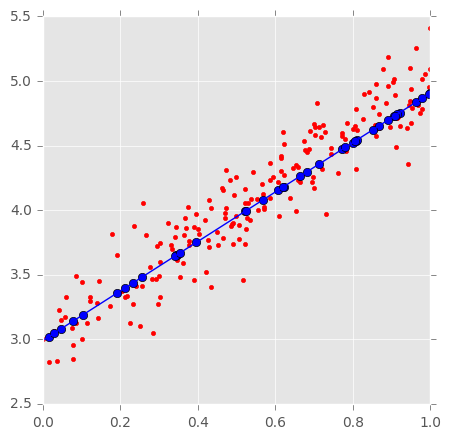

In [13]:
plt.figure(figsize=(5,5))
plt.plot(x, y, 'r.')
plt.plot(x_test, y_test_predict, 'bo')
plt.plot([b_,w_*1+b_], 'b-')
plt.show()